# TP4: Análisis exploratorio de vectores latentes
#### Tecnología Digital VI: Inteligencia Artificial
Federico Giorgi, Gastón Loza Montaña, Tomás Curzio

---------------

Se pueden descargar los vectores latentes desde `autoencoder_for_music.ipynb` o directamente desde este [$\textcolor{orange}{link}$](https://drive.google.com/file/d/18p4TbuM6bjr_iJbXdYildv4wKfIBrJij/view?usp=sharing).

In [14]:
# Importa librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [15]:
# Semilla para replicabilidad
SEED = 42

In [16]:
# Lectura de npy originales (según división en autoencoder)
original_test = np.load('../vectors/test/test_original.npy')
original_val = np.load('../vectors/val/val_original.npy')
original_train = np.load('../vectors/train/train_original.npy')

# Lectura de npy de labels (según división en autoencoder)
labels_test = np.load('../vectors/test/test_labels.npy')
labels_val = np.load('../vectors/val/val_labels.npy')
labels_train = np.load('../vectors/train/train_labels.npy')

## K-means

#### Gráfico Elbow

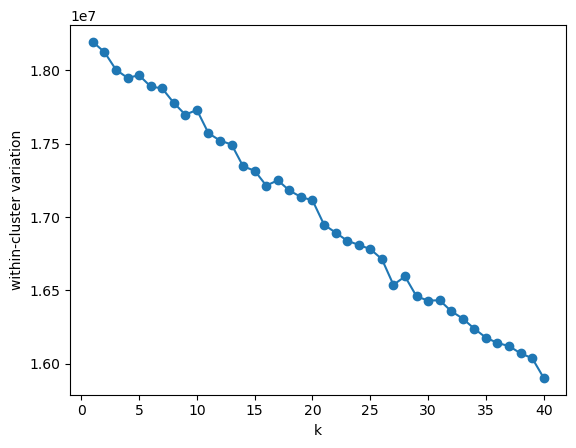

In [20]:
# Vectores del tamaño del vector latente elegido
lv_size = '18376'
# Lectura de vectores latente de npy (según división en autoencoder)
latent_vectors_test = np.load(f'../vectors/test/test_latent_vector_{lv_size}.npy')
latent_vectors_val = np.load(f'../vectors/val/val_latent_vector_{lv_size}.npy') 
latent_vectors_train = np.load(f'../vectors/train/train_latent_vector_{lv_size}.npy')

# Unimos todo para k-means (es no supervizado, no hace falta dividir según train y test)
all_latent_vectors = np.vstack((latent_vectors_train, latent_vectors_val, latent_vectors_test))

evol_variabilidad = []
for k in range(1, 41):
    kmeans = make_pipeline(StandardScaler(), KMeans(n_clusters=k, max_iter=30, n_init=20, random_state=SEED))
    kmeans.fit(all_latent_vectors)
    evol_variabilidad.append({"k": k, "var": kmeans[1].inertia_})

evol_variabilidad = pd.DataFrame(evol_variabilidad)
plt.figure()
plt.plot(evol_variabilidad["k"], evol_variabilidad["var"], marker="o")
plt.xlabel("k")
plt.ylabel("within-cluster variation")
plt.show()

#### Ejecución para cada tamaño de vector
k = 10 (por cantidad de géneros = 10)

Métricas: `homogenity_score` y `completeness_score`

In [4]:
# Unión de labels para k-means 
labels = np.hstack((labels_train, labels_val, labels_test))

# Unión de originales para k-means
og_data = np.vstack((original_train, original_val, original_test))

kmeans_og = make_pipeline(StandardScaler(), KMeans(n_clusters=10, max_iter=30, n_init=20, random_state=SEED))
kmeans_og.fit(og_data)

# Resultados para el tamaño de vector
print(f'Vector original')
print(f'Homogeneidad: {metrics.cluster.homogeneity_score(labels_true=labels, labels_pred=kmeans_og[1].labels_)}')
print(f'Completitud: {metrics.cluster.completeness_score(labels_true=labels, labels_pred=kmeans_og[1].labels_)}')

latent_sizes = ['55112', '32151', '24496', '18376', '9184']

for size in latent_sizes:
    # Lectura de vectores latente de npy (según división en autoencoder)
    latent_vectors_test = np.load(f'../vectors/test/test_latent_vector_{size}.npy')
    latent_vectors_val = np.load(f'../vectors/val/val_latent_vector_{size}.npy') 
    latent_vectors_train = np.load(f'../vectors/train/train_latent_vector_{size}.npy')

    # Unimos todo para k-means (es no supervizado, no hace falta dividir según train y test)
    all_latent_vectors = np.vstack((latent_vectors_train, latent_vectors_val, latent_vectors_test))

    # Algortimos de k-means con k=10
    kmeans_lv = make_pipeline(StandardScaler(), KMeans(n_clusters=10, max_iter=30, n_init=20, random_state=SEED))
    kmeans_lv.fit(all_latent_vectors)

    # Resultados para el tamaño de vector
    print(f'Tamaño vector latente: 1x{size}')
    print(f'Homogeneidad: {metrics.cluster.homogeneity_score(labels_true=labels, labels_pred=kmeans_lv[1].labels_)}')
    print(f'Completitud: {metrics.cluster.completeness_score(labels_true=labels, labels_pred=kmeans_lv[1].labels_)}')

c:\Users\gaston\miniconda3\envs\td6\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


Vector original
Homogeneidad: 0.009524295918147413
Completitud: 0.2799996728787592


c:\Users\gaston\miniconda3\envs\td6\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


Tamaño vector latente: 1x55112
Homogeneidad: 0.009101868780522403
Completitud: 0.29207126192085


c:\Users\gaston\miniconda3\envs\td6\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


Tamaño vector latente: 1x32151
Homogeneidad: 0.010536512118904183
Completitud: 0.28579684963788143


c:\Users\gaston\miniconda3\envs\td6\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


Tamaño vector latente: 1x24496
Homogeneidad: 0.009506297947913633
Completitud: 0.27947056019460403


c:\Users\gaston\miniconda3\envs\td6\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


Tamaño vector latente: 1x18376
Homogeneidad: 0.009533294903264303
Completitud: 0.28026422922083694


c:\Users\gaston\miniconda3\envs\td6\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


Tamaño vector latente: 1x9184
Homogeneidad: 0.009910279481253245
Completitud: 0.26881064842050245


## PCA

In [21]:
def plot_pca_3D(data, size, original):
    # Escalado del vector
    scaler = StandardScaler(with_std=True, with_mean=True)
    # Fiteo (calculo de mean y std)
    scaler.fit(data)
    # Aplico transformación
    scaled_data = pd.DataFrame(scaler.transform(data))

    # Definición de PCA
    pca = PCA()
    # Fiteo de PCA
    pca.fit(scaled_data)

    # Transformo la data en el subespacio dado por las componentes principales
    transformed_data = pca.transform(scaled_data)

    # Extracción de las primeras 3 componentes principales
    pc1 = transformed_data[:, 0]
    pc2 = transformed_data[:, 1]
    pc3 = transformed_data[:, 2]

    # Definición de colores de los géneros
    unique_labels = pd.Series(labels_all).unique()
    colors = plt.cm.tab10.colors[:len(unique_labels)]
    label_color_map = {label: color for label, color in zip(unique_labels, colors)}
    point_colors = [label_color_map[label] for label in labels_all]

    # Creación del plot 3D
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')

    ax.set_xlim([-5, 5])
    ax.set_ylim([-5, 5])
    ax.set_zlim([-5, 5]) 

    # Ploteo
    ax.scatter(pc1, pc2, pc3, c=point_colors, marker='o', alpha=0.5)
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    if original:
        ax.set_title(f'Vector original')
    else:
        ax.set_title(f'Vector latente 1x{size}')

    plt.show()

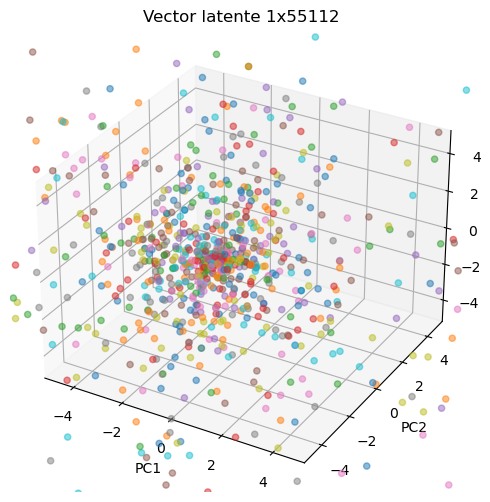

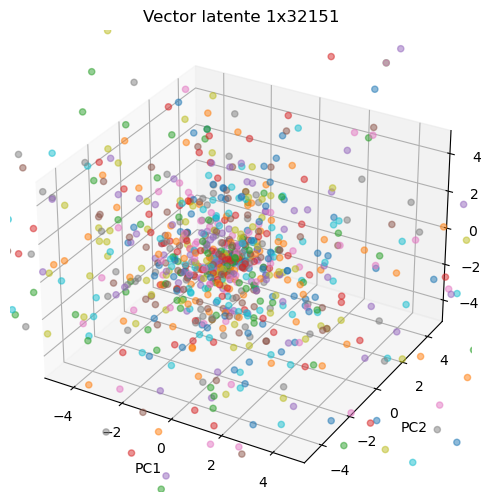

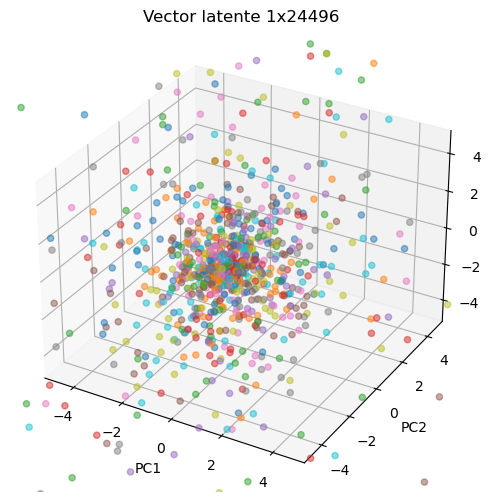

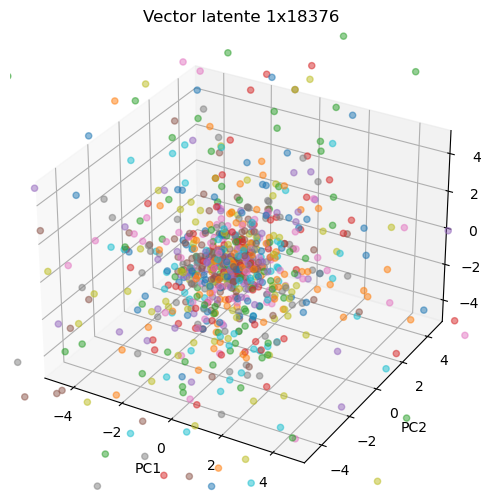

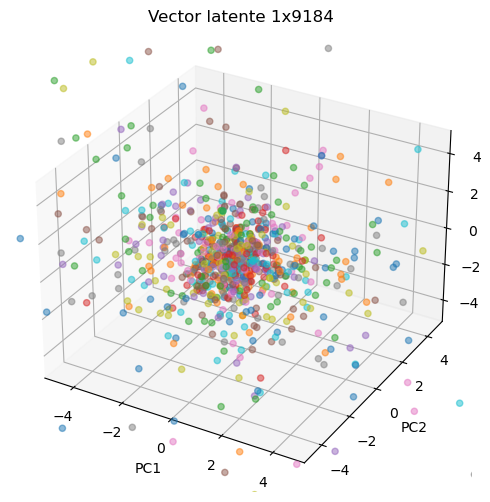

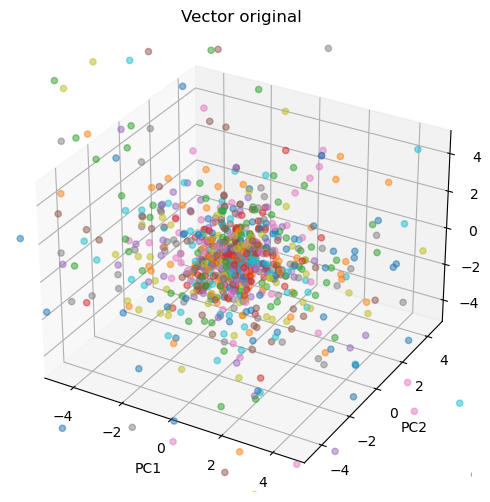

In [22]:
labels_all = np.hstack((labels_train, labels_val, labels_test))

latent_sizes = ['55112', '32151', '24496', '18376', '9184']

for size in latent_sizes:
    # Lectura de vectores latente de npy (según división en autoencoder)
    latent_vectors_test = np.load(f'../vectors/test/test_latent_vector_{size}.npy')
    latent_vectors_val = np.load(f'../vectors/val/val_latent_vector_{size}.npy') 
    latent_vectors_train = np.load(f'../vectors/train/train_latent_vector_{size}.npy')

    # Unimos todo para k-means (es no supervizado, no hace falta dividir según train y test)
    all_latent_vectors = np.vstack((latent_vectors_train, latent_vectors_val, latent_vectors_test))

    plot_pca_3D(all_latent_vectors, size, False)

plot_pca_3D(all_latent_vectors, 0, True)

## Árbol de decisión

In [25]:
# Usamos las de val y train del autoencoder como train
train_labels = np.hstack((labels_train, labels_val))
test_labels = labels_test

train_og_data = np.vstack((original_train, original_val))
test_og_data = original_test

# Entrenamiento del árbol
clf = DecisionTreeClassifier(random_state=SEED)
clf.fit(train_og_data, train_labels)

# Predicción
pred_labels = clf.predict(test_og_data)

# Métrica
print(f'Vector original')
print(f'Accuracy (test): {metrics.accuracy_score(test_labels, pred_labels)}')

latent_sizes = ['55112', '32151', '24496', '18376', '9184']

for size in latent_sizes:
    # Lectura de vectores latente de npy (según división en autoencoder)
    latent_vectors_test = np.load(f'../vectors/test/test_latent_vector_{size}.npy')
    latent_vectors_val = np.load(f'../vectors/val/val_latent_vector_{size}.npy') 
    latent_vectors_train = np.load(f'../vectors/train/train_latent_vector_{size}.npy')

    # Unimos todo para k-means (es no supervizado, no hace falta dividir según train y test)
    train_latent_vectors = np.vstack((latent_vectors_train, latent_vectors_val))
    test_latent_vector = latent_vectors_test

    # Entrenamiento del árbol
    clf = DecisionTreeClassifier(random_state=SEED)
    clf.fit(train_latent_vectors, train_labels)

    # Predicción
    pred_labels = clf.predict(test_latent_vector)

    # Métrica
    print(f'Tamaño vector latente: {size}')
    print(f'Accuracy (test): {metrics.accuracy_score(test_labels, pred_labels)}')

Vector original
Accuracy (test): 0.16
Tamaño vector latente: 55112
Accuracy (test): 0.15
Tamaño vector latente: 32151
Accuracy (test): 0.15
Tamaño vector latente: 24496
Accuracy (test): 0.11
Tamaño vector latente: 18376
Accuracy (test): 0.1
Tamaño vector latente: 9184
Accuracy (test): 0.1
